### Imports

In [1]:
import utils
import random
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Loading

### Data import

In [2]:
data, label = utils.load_csv('./data/mnist_train.csv')

In [3]:
print( 'X-VAL LEN: ', len(data) )

print( 'Y-VAL LEN: ', len(label) )

X-VAL LEN:  60000
Y-VAL LEN:  60000


In [4]:
## Row length
len(data[0])

784

In [5]:
len(label)

60000

In [6]:
set(label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
print("Training data loaded with {count} images".format(count=len(data)))

Training data loaded with 60000 images


In [8]:
1.1

1.1

### 1.1 Data Preparation

#### Train Val Split

In [9]:
len_data = len(data)
len_label = len(label)

if 0 in {len_data, len_label}:
    print( 'ye')
else:
    print('na')

na


In [10]:
len(data[:80])

80

In [11]:
split_percentage = 0.8
len_train = int(len_data*0.8)


In [12]:
len_train

48000

In [13]:
len(data[:len_train])

48000

In [14]:
train_data = data[:len_train]
train_label = label[:len_train]
val_data = data[len_train:]
val_label = label[len_train:]

In [15]:
len(val_label)

12000

In [16]:
len(val_data+train_data)

60000

__Test function in .py file__

In [17]:
train_data, train_label, val_data, val_label = utils.load_mnist_trainval()

Loading training data...
Training data loaded with 60000 images


In [18]:
len(train_label)

48000

#### Generate batched data

In [20]:
seed = True
shuffle = True

In [21]:
if seed:
    np.random.seed(42)
if shuffle:
    random_index = list(np.random.permutation(len(train_data))) ## Returns permuted range to keep data in line
    data_arr = np.array(train_data)
    label_arr = np.array(train_label)
    data = list(data_arr[random_index])
    label = list(label_arr[random_index])

In [34]:
batch_size = 32
batched_data = [data[d * batch_size:(d + 1) * batch_size] for d in range((len(data) + batch_size - 1) // batch_size)]
batched_label = [label[d * batch_size:(d + 1) * batch_size] for d in range((len(label) + batch_size - 1) // batch_size )]


In [35]:
len(batched_label)

1500

## 2. Model Implementation

### 2.1 Utility Function

In [46]:
x_pred = [1, 2, 3, 4, 5]
y = [1, 2, 3, 3, 4]
## Accuracy
t = 0
for i in range(len(x_pred)):
    if x_pred[i] == y[i]:
        t += 1
print(t/len(x_pred))

0.6


In [48]:
np.max(y)

4

In [50]:
import utils
import models

### 2.2 Model Implementation

In [ ]:
def _weight_init(self):
    '''
    initialize weights of the single layer regression network. No bias term included.
    :return: None; self.weights is filled based on method
    - W1: The weight matrix of the linear layer of shape (num_features, hidden_size)
    '''
    np.random.seed(1024)
    self.weights['W1'] = 0.001 * np.random.randn(self.input_size, self.num_classes)
    self.gradients['W1'] = np.zeros((self.input_size, self.num_classes))

In [69]:
weights = dict()
gradients = dict()
input_size = 28*28
num_classes = 10

weights['W1'] = 0.001 * np.random.randn(input_size, num_classes)
gradients['W1'] = np.zeros((input_size, num_classes))

In [86]:
a = np.dot(data, weights['W1'])
Z = 1 / (1 + np.exp(-a))
y = label

#### Cross Entropy

In [169]:
def cross_entropy(predictions, targets):
    N = predictions.shape[0]
#     predictions = 1 / (1 + np.exp(-predictions))
    targets = one_hot_encoder(predictions, targets)
#     print(targets)
    ce = -np.sum(targets * np.log(predictions)) / N
    return ce

def one_hot_encoder(x, y):
    nb_classes = len(x)
    return np.eye(nb_classes)[y]

In [170]:
x = np.array([[0.2, 0.5, 0.3], [0.5, 0.1, 0.4], [0.3, 0.3, 0.4]])
y = np.array([1, 2, 0])

expected_loss = 0.937803

In [171]:
cross_entropy(x, y)

0.9378035722533454

#### accuracy

In [301]:
x = np.array([[0.2, 0.5, 0.3], [0.5, 0.1, 0.4], [0.3, 0.3, 0.4]])
y = np.array([1, 2, 0])
expected_acc = 0.3333

In [313]:
y_pred = np.argmax(x, axis=1)

In [315]:
y_pred

array([1, 0, 2])

In [318]:
(y == y_pred)

array([ True, False, False])

#### softmax

In [337]:
exp = np.exp(x)
sum_exp = np.sum(exp)
prob =  exp/sum_exp

prob

array([[0.09649833, 0.13025912, 0.10664715],
       [0.13025912, 0.0873153 , 0.11786333],
       [0.10664715, 0.10664715, 0.11786333]])

In [338]:
exp = np.exp(x - np.max(x))
sum_exp = np.sum(exp)
prob =  exp/sum_exp
prob

array([[0.09649833, 0.13025912, 0.10664715],
       [0.13025912, 0.0873153 , 0.11786333],
       [0.10664715, 0.10664715, 0.11786333]])

#### Relu

In [212]:
z

array([[-0.2,  0.5,  0.3],
       [ 0.5,  0.1,  0.4],
       [ 0.3,  0.3,  0.4]])

In [208]:
def ReLU(X):
    '''
    Compute the ReLU activation for the input

    :param X: the input data coming out from one layer of the model (N, num_classes)
    :return:
        out: the value after the ReLU activation is applied to the input (N, num_classes)
    '''
    out = np.maximum(0, X)
    return out

In [213]:
ReLU(z)

array([[0. , 0.5, 0.3],
       [0.5, 0.1, 0.4],
       [0.3, 0.3, 0.4]])

In [216]:
def ReLU_dev(X):
        '''
        Compute the gradient ReLU activation for the input

        :param X: the input data coming out from one layer of the model (N, num_classes)
        :return:
            out: gradient of ReLU given input X
        '''
        out = np.greater(X, 0).astype(int)

        return out

In [231]:
np.greater(z,0).astype(int)

array([[0, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

#### sigmoid

In [372]:
x = np.array([[-1.48839468, -0.31530738],
              [-0.28271176, -1.00780433],
              [0.66435418, 1.2537461],
              [-1.64829182, 0.90223236]])
y = np.array([[0.23629739, 0.76370261],
              [0.67372745, 0.32627255],
              [0.35677439, 0.64322561],
              [0.07239128, 0.92760872]])

out = softmax(x)

np.sum(np.abs((y - out)))

1.7371236074592566e-08

In [362]:
out

array([[0.02217823, 0.07167905],
       [0.07405397, 0.03586284],
       [0.19092107, 0.34421003],
       [0.01890099, 0.24219381]])

In [371]:
def softmax(scores): 
    exp = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    sum_exp = np.sum(exp, axis=-1, keepdims=True)
    prob =  exp/sum_exp
    return prob

def softmax2(x):
    mx = np.max(x, axis=-1, keepdims=True)
    numerator = np.exp(x - mx)
    denominator = np.sum(numerator, axis=-1, keepdims=True)
    return numerator/denominator

## 3. Optimizer

In [ ]:
def softmax(self, scores):
    '''
    Compute softmax scores given the raw output from the model

    :param scores: raw scores from the model (N, num_classes)
    :return:
        prob: softmax probabilities (N, num_classes)
    '''

    exp = [np.exp(i) for i in scores]
    sum_exp = np.sum(exp)
    prob =  [j/sum_exp for j in exp]

    return prob

## 4. Visualization

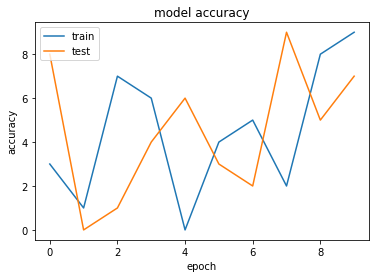

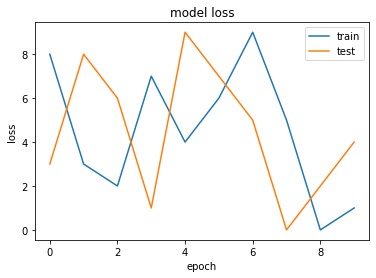

In [90]:
def plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history):
    '''
    Plot learning curves with matplotlib. Make sure training loss and validation loss are plot in the same figure and
    training accuracy and validation accuracy are plot in the same figure too.
    :param train_loss_history: training loss history of epochs
    :param train_acc_history: training accuracy history of epochs
    :param valid_loss_history: validation loss history of epochs
    :param valid_acc_history: validation accuracy history of epochs
    :return: None, save two figures in the current directory
    '''
    
    plt.plot(train_loss_history)
    plt.plot(valid_loss_history)
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'valid'])
    plt.show()

    plt.plot(train_acc_history)
    plt.plot(valid_acc_history)
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'valid'])
    plt.show()